<div dir="rtl" style="text-align: right;">

# Arabic Punctuaion Pridiction  
# ترقيم النصوص العربية

- عبدالرحمن محمد الحامض  
- عبدالحافظ ماهر الكردي  
- محمد عبادة خلدون المصري  

---

هذا الملف مقسم على الشكل التالي:

- تحليل البيانات  
- عملية المعالجة المسبقة  
- إجراء تدريب على عدة نماذج  
- النتائج  

</div>


<div dir="rtl" style="text-align: right;">

## 1- تحليل البيانات الاستكشافي (EDA)

في هذا القسم قمنا بإجراء مجموعة من التحليلات التي تساعدنا في ثلاث نقاط:

- فهم معمق للبيانات  
- فهم المشاكل والتحديات لمعالجتها  
- وضع قرارات صائبة للمعالجة المسبقة والنمذجة  

---

قبل الخوض في هذا القسم،  
قمنا بتحليل ورقة مجموعة البيانات واستخلصنا منها بعض الأفكار التي تعطينا نظرة أعمق لما نتعامل معه.

تباينت هذه الملاحظات بين:

- فهم بنية البيانات  
- مفهوم الجملة وارتباطه بالمسألة  
- قيود يجب أخذها بالحسبان  

 الملاحظات كما يلي:

- النصوص في جزئية الأمم المتحدة ليست مضمونة من ناحية الدقة واكتمال الجمل، لذلك يجب الانتباه لمعالجة الجمل غير المكتملة.  

- علامات الترقيم تفيد في تصنيف النصوص، وقد يكون هناك تقاطع مع المسألة الأولى.  
  حيث يمكن استخراج ميزات مثل:
  - نوع علامة الترقيم  
  - موقعها  
  - الكلمات المجاورة  
  - بنية الجملة المرتبطة بها  

- تنوع البنى النحوية للجملة يساعد في تصنيف الجمل والتفريق بين أنواعها المختلفة.  
  هذه الجمل ليست منفصلة عن السياق العام، بل تعتمد على النص الأكبر الذي جاءت منه.

- تُصنَّف الجمل:
  - **وظيفياً**: خبرية، استفهامية، أمرية، تعجبية  
  - **بنيوياً**:
    - بسيطة (مسند ومسند إليه)  
    - مركبة (مرتبطة بأحرف عطف)  
    - معقدة (جملة رئيسية + جملة فرعية)

- تم فصل الجمل في مجموعة البيانات اعتماداً على قاعدة **Theme–Rheme**:
  - **Theme**: الموضوع الذي تبدأ به الجملة  
  - **Rheme**: الخبر أو المعلومات الجديدة  

  **مثال 1:**  
  دخل الطالب القاعة وجلس في الصف الأول  
  - الموضوع: الطالب  
  - الخبر: دخل القاعة + جلس في الصف الأول  

  **مثال 2:**  
  حضر الطالب إلى الجامعة، وبدأ الأستاذ المحاضرة  
  - موضوع 1: الطالب  
  - موضوع 2: الأستاذ  
  → جملتان منفصلتان  

- مجموعة البيانات لم تكن مخصصة بالأصل لتكون مجموعة علامات ترقيم، ولكن تم استخدامها لأن علامات الترقيم فيها أصلية وتخضع لقواعد محددة.  

- هناك علاقة بين علامات الترقيم والظواهر اللغوية الأخرى:  
  - النحو Syntax: قرأ الطالب الكتاب، ثم كتب الملخص، تأتي الفاصلة مع حدود الجملة.  
  - المعنى الدلالي Semantic: لا نوافق على القرار (رفض). لا، نوافق على القرار (قبول).  
  - التداولية Pragmatics (النية، السياق): فعلت هذا حقاً؟ (استفهام) فعلت هذا حقاً! (تعجب)

- تختلف أطوال الجمل، يُعدّ النثر غير الخيالي في ABC الأقصر، بينما تُعدّ الجمل النصية القانونية في SSAC-UNPC الأطول.

- لوحظ أنه في مجموعتي بيانات CBT و SSAC-UNPC، تحتل الفواصل والنقاط المرتبة الأولى والثانية على التوالي من حيث التكرار، بينما ينعكس ترتيبهما في مجموعة بيانات ABC. ويعود هذا التباين إلى قرار المُعلِّقين بالتركيز على نهاية الجملة، مما يؤدي غالباً إلى استبدال الفواصل بالنقاط.

- من حيث التكرار النسبي لعلامات نهاية الجملة، تُعدّ النقطة الأكثر تكراراً، تليها علامة الاستفهام، ثم علامة التعجب الأقل تكراراً. ويُرجّح أن يكون هذا النمط هو السائد في لغات أخرى أيضاً، نظراً لأن التعبير عن المشاعر أقل شيوعاً في النصوص من تبادل الأفكار.

- تم تعريف مفهوم "الجملة" إجرائياً في مجموعة البيانات على النحو التالي:
  - كلمة واحدة أو مجموعة كلمات تُعدّ معلومةً بغض النظر عما يسبقها أو يليها.  
  - بغض النظر عن حروف العطف، فإن الجملة مستقلة بذاتها وكاملة.  
  - يمكن نطقها منفردةً دون أن تفقد قدرتها على الإسناد، أو التأكيد، أو الأمر، أو الاستفهام، أو التعجب.  
  - تُترك الفواصل وعلامات الترقيم الأخرى داخل الجملة دون تغيير لأنها اختيارية في المقام الأول.

- يتراوح طول الجمل في الأجزاء الثلاثة من APD بين 17 و 26 كلمة.

- تتشابه قواعد الترقيم CBT و SSAC-UNPC مع قواعد ABC من حيث أنها تتبع معيار الترقيم القائم على الموضوع والخبر؛ وهذا يجعل قواعد الترقيم الخاصة بها قائمة على قواعد rule-based.

- تعطي هذه المجموعة من البيانات الأولوية لتحديد حدود الجملة على حساب التمييز الدقيق بين علامات الترقيم. لذلك مهمة إضافة النقطة قد تكون أكثر فاعلية من إضافة جميع علامات الترقيم.  
  مع ذلك، لا يزال تقسيم الجملة بدقة تحدياً رئيساً في معالجة اللغة العربية الطبيعية.

- تضمين وتحديد علامات الترقيم الأخرى كان أقل دقة، لذلك بالنسبة للباحثين الذين يسعون إلى تحليل استخدام علامات الترقيم الدقيقة، قد تتطلب مجموعة البيانات هذه مزيداً من التوسيم Annotation.  
  ومع ذلك، بالنسبة للباحثين المهتمين بعلامات الترقيم المحددة، سيحتاجون فقط إلى التركيز على الفواصل المنقوطة وعلامات التعجب، والتي ليست ذات استخدام شائع على أي حال.

 منه استنتجنا:

- تنظيف البيانات من الجمل غير المكتملة  
- الاستفادة من ميزات مثل موقع علامة الترقيم والكلمات المجاورة وبنية الجملة للمساعدة في تنبؤ أكثر دقة  
- أخذ سياق أكبر للجملة لفهم المعنى الصحيح  
- الأخذ بالحسبان التفاوت بين دقة نتائج التنبؤ لعلامات الترقيم المختلفة لأن مجموعة البيانات في طبيعتها غير متوازنة في التوزيع العادل بينها  
- المهمة ذات الدقة الأفضل يجب أن تكون لصالح الفواصل والنقاط، بينما سنواجه مشاكل في علامات التعجب والفواصل المنقوطة  
- قد نقوم بتجربة مهمة إضافة نقطة فقط (التعرف على حدود الجملة) لأنها المسألة ذات الكفاءة الأفضل بالنسبة لمجموعة البيانات هذه  
- قد نحتاج لوضع وزن أكبر لعلامات الترقيم النادرة مثل علامات التعجب والفواصل المنقوطة، وفي أسوأ الحالات قد يتم حذف الحالة كلها من المسألة  

</div>


<div dir="rtl" style="text-align: right;">

ملاحظة: قد تكون مجموعة التحليلات هذه معمقة، لكنها تساعد في فهم البيانات وطرق معالجة المشاكل بشكل أفضل وتوفير الوقت لاحقاً.

فهرس طرق تحليل البيانات:
- نظرة عامة عن بنية الملفات وحجم مجموعة البيانات

قبل البدء، نقوم بتحضير المكتبات والتوابع المساعدة.

</div>


In [27]:
# تنزيل المكتيات المستخدمة
# %pip install numpy pandas matplotlib natsort seaborn scipy scikit-learn arabic-reshaper python-bidi tqdm transformers

In [28]:
# للربط بالتخزين السحابي و الوصول للبيانات
# from google.colab import drive
# drive.mount("/content/drive")

In [29]:
# شرح للمكتبات

import os                      # لاجراء العمليات على الملفات
import re                      # للتعامع مع regular expressions
import random                  # لاخذ عينات عشوائية من البيانات
import unicodedata             # لتحليل المحارف
from collections import Counter # لعد التكرارات بكفاءة
from pathlib import Path       # للتعامل مع مسارات الملفات
from typing import List        # للتعامل مع انواع البينات
import numpy as np             # لللعميات الرياضية
import pandas as pd            # للتلاعب بالبيانات
import matplotlib.pyplot as plt    # للرسوم البيانية
import seaborn as sns              # للرسوم الاحصائية
from scipy.stats import chi2_contingency, pointbiserialr  # لاجراء عمليات تحليل متقدمة
from sklearn.feature_extraction.text import TfidfVectorizer  # لتحويل النص الى متجهات عددية
from sklearn.decomposition import NMF                         # لدراسة مواضيع النصوص
from sklearn.ensemble import RandomForestClassifier           # لدراسة اهمية الميزات Features
import arabic_reshaper         # لدعم اللغة العربية
from bidi.algorithm import get_display  # لعرض النصوص المصححة
from tqdm import tqdm      # شريط تحميل يستخدم في عمليات التحليل و المعالجة الطويلة
TQDM_AVAILABLE = True
import transformers           # لنماذج التعلم العميق الخاصة بمعالجة اللغة الطبيعية
from natsort import natsorted              # لفرز الملفات و البيانات بشكل طبيعي

# تجهيز المتغيرات العامة

# موقع مجلد البيانات
if os.path.exists("/content/drive/MyDrive"): # تحميل مسار على السحابة ان واجد, و اللا المسار المحلي
    DATASET_DIR = Path("/content/drive/MyDrive/datasets/SSAC-UNPC")
else:
    DATASET_DIR = "../SSAC-UNPC"

print(f"📁 Dataset path: {DATASET_DIR}")

# احجام العينات المستخدمة في التحليل الاستكشافي للبيانات
# قيم تجريبة لأخذ عينات بسيطة
# SAMPLE_SIZES = {
#     'basic_exploration': 10,           # عينات للاستكشاف البسيط
#     'line_count': None,                # عدد الاسطر التي يتم قراءتها (None = كل الاسطر)
#     'random_samples': 20,              # عدد العينات العشوائية للعرض
#     'sentence_length': 500_000,        # عينات لتوزيع اطوال الجمل
#     'punctuation_frequency': 1_000_000, # عينات لعد علامات الترقيم
#     'sentence_terminals': 500_000,     # عينات لتحليل نهايات الكلمات
#     'vocabulary': 500_000,             # عينات لحساب تكرار المفردات و الكلمات 
#     'punctuation_context': 200_000,    # عينات لتحليل السياق حول علامات الترقيم
#     'ngrams': 200_000,                 # عينات لتحليل n-grams
#     'pos_analysis': 10_000,            # عينات لتحليل الكلمات حسب نوعها النحوي
#     'class_imbalance': 1_000_000,      # عينات لحساب توازن الفئات
#     'length_punct_relationship': 500_000,  # عينات لتحليل علاقة الطول بعلامات الترقيم
#     'topic_analysis': 50_000,          # عينات لتحليل مواضيع النصوص
#     'character_analysis': 1_000_000,   # عينات لتحليل المحارف
#     'preprocessing_recommendations': 100_000, # عينات لتوصيات المعالجة المسبقة
#     'tokenizer_comparison': 10_000,    # عينات لتحليل المُحلل النحوي 
#     'feature_correlation': 100_000,    # عينات لتحليل الارتباط بين الميزات
# }

# قيم كاملة لتحليل بيانات بشكل ادق
SAMPLE_SIZES = {
    'basic_exploration': 10,           # عينات للاستكشاف البسيط
    'line_count': None,                # عدد الاسطر التي يتم قراءتها (None = كل الاسطر)
    'random_samples': 20,              # عدد العينات العشوائية للعرض
    'sentence_length': 11_731_360,        # عينات لتوزيع اطوال الجمل
    'punctuation_frequency': 11_731_360, # عينات لعد علامات الترقيم
    'sentence_terminals': 11_731_360,     # عينات لتحليل نهايات الكلمات
    'vocabulary': 11_731_360,             # عينات لحساب تكرار المفردات و الكلمات
    'punctuation_context': 11_731_360,    # عينات لتحليل السياق حول علامات الترقيم
    'ngrams': 11_731_360,                 # عينات لتحليل n-grams
    'pos_analysis': 10_000,            # عينات لتحليل الكلمات حسب نوعها النحوي
    'class_imbalance': 11_731_360,      # عينات لحساب توازن الفئات
    'length_punct_relationship': 11_731_360,  # عينات لتحليل علاقة الطول بعلامات الترقيم
    'topic_analysis': 50_000,          # عينات لتحليل مواضيع النصوص
    'character_analysis': 11_731_360,   # عينات لتحليل المحارف
    'preprocessing_recommendations': 11_731_360,  # عينات لتوصيات المعالجة المسبقة
    'tokenizer_comparison': 10_000,    # عينات لتحليل المُحلل النحوي
    'feature_correlation': 1000_000,    # عينات لتحليل الارتباط بين الميزات
}

# إعداد matplotlib
plt.style.use('seaborn-v0_8-whitegrid')  # نمط الرسم البياني
plt.rcParams['figure.figsize'] = (12, 6)  # حجم الشكل الافتراضي
plt.rcParams['font.size'] = 11            # حجم الخط الافتراضي
plt.rcParams['axes.titlesize'] = 14       # حجم خط العناوين
plt.rcParams['axes.labelsize'] = 12       # حجم خط التسميات
plt.rcParams['font.family'] = 'DejaVu Sans' # لدعم عرض النصوص العربية

# مجلد حفظ الرسوم البيانية الناتجة
OUTPUT_DIR = "eda_outputs" 
os.makedirs(OUTPUT_DIR, exist_ok=True)  # إنشاء المجلد إذا لم يكن موجودًا

# ضبط معامل العشوائية لضمان تكرار النتائج
RANDOM_SEED = 42 
random.seed(RANDOM_SEED) 
np.random.seed(RANDOM_SEED) 

# شرح التوابع

# دالة لقراءة جميع الأسطر في ملفات مجموعة البيانات, تنفيذ (lazy loading)
def iter_dataset_lines(dataset_dir: str, encoding="utf-8"):
    for file_path in sorted(Path(dataset_dir).glob("*.txt")):
        with open(file_path, "r", encoding=encoding) as f:
            for line in f:
                yield line.rstrip("\n") 

# تنسيق الأرقام الكبيرة بفواصل
def format_number(num: int) -> str:
    return f"{num:,}"

# حفظ الرسوم البيانية
def save_figure(fig, filename: str, dpi: int = 150):
    filepath = os.path.join(OUTPUT_DIR, filename) 
    fig.savefig(filepath, dpi=dpi, bbox_inches='tight', facecolor='white')
    logger.info(f"📊 Figure saved: {filepath}")

# معالجة النصوص العربية للعرض الصحيح
def handle_arabic(input_string: str) -> str:
    reshaped_text = arabic_reshaper.reshape(input_string)
    return get_display(reshaped_text)

def process_arabic_words(words: List[str]) -> List[str]:
    return [handle_arabic(word) for word in words]

# حفظ النتائج المطبوعة في ملف
class NotebookLogger:
    def __init__(
        self,
        log_file: str | Path = "notebook.log",
        enable_console: bool = True,
        enable_file: bool = True,
    ):
        self.log_file = Path(log_file)
        self.enable_console = enable_console
        self.enable_file = enable_file
        
        if self.enable_file:
            self.log_file.parent.mkdir(parents=True, exist_ok=True)  
            
    def _write(self, message: str):
        if self.enable_console:
            print(message, end="")

        if self.enable_file:
            with self.log_file.open("a", encoding="utf-8") as f:
                f.write(message)

    def info(self, message: str):
        self._write(f"{message}\n")

logger = NotebookLogger(log_file="logs/notebook.log")

# شرح المتغيرات المساعدة للنصوص العربية

ARABIC_RANGE = '\u0600-\u06FF'        # الحروف العربية الرئيسية
ARABIC_SUPPLEMENT = '\u0750-\u077F'   # ملحق العربية
ARABIC_EXTENDED_A = '\u08A0-\u08FF'   # العربية الموسعة 

# تجهيز متحول re للمطابقة و البحث عن الاحرف العربية بكفاءة
ARABIC_WORD_PATTERN = re.compile(f'[{ARABIC_RANGE}{ARABIC_SUPPLEMENT}{ARABIC_EXTENDED_A}]+')

# Function to expand a range string like '\u0600-\u06FF' into all characters
def expand_unicode_range(range_str):
    start, end = range_str.split('-')
    start_cp = ord(start)
    end_cp = ord(end)
    return [chr(cp) for cp in range(start_cp, end_cp + 1)]

# Expand all ranges
all_chars = (
    expand_unicode_range(ARABIC_RANGE) +
    expand_unicode_range(ARABIC_SUPPLEMENT) +
    expand_unicode_range(ARABIC_EXTENDED_A)
)

# Print organized: 32 characters per line
chars_per_line = 32
print("Arabic Characters in Defined Ranges:\n")
for i in range(0, len(all_chars), chars_per_line):
    print(' '.join(all_chars[i:i + chars_per_line]))

print(f"\nTotal characters: {len(all_chars)}")


# علامات الترقيم 
PUNCTUATION_MARKS = { 
    # Arabic punctuation
    '،': 'Arabic Comma',
    '؛': 'Arabic Semicolon',
    '؟': 'Arabic Question Mark',
    
    # Latin/Common punctuation
    '.': 'Full Stop (Period)',
    ',': 'Latin Comma',
    ';': 'Latin Semicolon',
    ':': 'Colon',
    '?': 'Latin Question Mark',
    '!': 'Exclamation Mark',
}

OTHER_MARKS =  {
    # Other punctuation
    '…': 'Ellipsis',
    '-': 'Hyphen',
    '–': 'En Dash',
    '—': 'Em Dash',
    
    # Quotation marks
    '"': 'Double Quote',
    '"': 'Left Double Quote',
    '"': 'Right Double Quote',
    '«': 'Left Guillemet',
    '»': 'Right Guillemet',
    "'": 'Single Quote',
    
    # Brackets
    '(': 'Left Parenthesis',
    ')': 'Right Parenthesis',
    '[': 'Left Square Bracket',
    ']': 'Right Square Bracket',
    '{': 'Left Curly Brace',
    '}': 'Right Curly Brace',
}

SENTENCE_TERMINALS = {'.', '؟', '?', '!', '؛', ';'}  # علامات نهاية الجملة

# حركات اللغة العربية (تشكيل) 
ARABIC_DIACRITICS = {
    '\u064B': 'Fathatan ً',
    '\u064C': 'Dammatan ٌ',
    '\u064D': 'Kasratan ٍ',
    '\u064E': 'Fatha َ',
    '\u064F': 'Damma ُ',
    '\u0650': 'Kasra ِ',
    '\u0651': 'Shadda ّ',
    '\u0652': 'Sukun ْ',
}

# حالات خاصة من الحروف عربية 
SPECIAL_ARABIC_CHARS = {
    '\u0640': 'Tatweel ـ',           
    '\u0621': 'Hamza ء',             
    '\u0622': 'Alef Madda آ',        
    '\u0623': 'Alef Hamza Above أ',  
    '\u0625': 'Alef Hamza Below إ',  
    '\u0627': 'Alef ا',              
    '\u0629': 'Teh Marbuta ة',       
    '\u0649': 'Alef Maksura ى',      
}


# كلمات توقف شائعة في اللغة العربية 
ARABIC_STOPWORDS = [
    # حروف الجر
    'من', 'في', 'على', 'إلى', 'عن', 'مع', 'بين', 'عند', 'حتى', 'منذ', 'مثل', 'خلال', 'رغم', 'أمام', 'وراء',
    # أسماء الإشارة
    'هذا', 'هذه', 'ذلك', 'تلك', 'هؤلاء', 'أولئك', 'هنا', 'هناك', 'هكذا',
    # ضمائر الوصل
    'التي', 'الذي', 'اللذان', 'اللتان', 'الذين', 'اللاتي', 'اللواتي',
    # أدوات العطف
    'و', 'أو', 'ثم', 'لكن', 'بل', 'إذا', 'لو', 'إذ',
    # أدوات الشرط
    'أن', 'إن', 'قد', 'لا', 'ما', 'لم', 'لن', 'ل', 'ب', 'ك', 'ف', 'بدون',
    # ضمائر
    'هو', 'هي', 'هم', 'هن', 'أنا', 'نحن', 'أنت', 'أنتم', 'لي', 'لك', 'له', 'لها', 'لهم', 'لنا',
    # أفعال 
    'كان', 'كانت', 'يكون', 'تكون', 'كانوا', 'سيكون', 'ستكون', 'ليس',
    # محددات
    'كل', 'بعض', 'أي', 'غير', 'بعد', 'قبل', 'حيث', 'عندما',
    # ظروف
    'أيضًا', 'فقط', 'دائمًا', 'أبدًا', 'حاليًا', 'سرعان', 'تمامًا'
]

logger.info("✅ Arabic text utilities loaded!")
logger.info(f"   - Punctuation marks defined: {len(PUNCTUATION_MARKS)}")
logger.info(f"   - Diacritics defined: {len(ARABIC_DIACRITICS)}")
logger.info(f"   - Stopwords defined: {len(ARABIC_STOPWORDS)}")



📁 Dataset path: ../SSAC-UNPC
Arabic Characters in Defined Ranges:

؀ ؁ ؂ ؃ ؄ ؅ ؆ ؇ ؈ ؉ ؊ ؋ ، ؍ ؎ ؏ ؐ ؑ ؒ ؓ ؔ ؕ ؖ ؗ ؘ ؙ ؚ ؛ ؜ ؝ ؞ ؟
ؠ ء آ أ ؤ إ ئ ا ب ة ت ث ج ح خ د ذ ر ز س ش ص ض ط ظ ع غ ػ ؼ ؽ ؾ ؿ
ـ ف ق ك ل م ن ه و ى ي ً ٌ ٍ َ ُ ِ ّ ْ ٓ ٔ ٕ ٖ ٗ ٘ ٙ ٚ ٛ ٜ ٝ ٞ ٟ
٠ ١ ٢ ٣ ٤ ٥ ٦ ٧ ٨ ٩ ٪ ٫ ٬ ٭ ٮ ٯ ٰ ٱ ٲ ٳ ٴ ٵ ٶ ٷ ٸ ٹ ٺ ٻ ټ ٽ پ ٿ
ڀ ځ ڂ ڃ ڄ څ چ ڇ ڈ ډ ڊ ڋ ڌ ڍ ڎ ڏ ڐ ڑ ڒ ړ ڔ ڕ ږ ڗ ژ ڙ ښ ڛ ڜ ڝ ڞ ڟ
ڠ ڡ ڢ ڣ ڤ ڥ ڦ ڧ ڨ ک ڪ ګ ڬ ڭ ڮ گ ڰ ڱ ڲ ڳ ڴ ڵ ڶ ڷ ڸ ڹ ں ڻ ڼ ڽ ھ ڿ
ۀ ہ ۂ ۃ ۄ ۅ ۆ ۇ ۈ ۉ ۊ ۋ ی ۍ ێ ۏ ې ۑ ے ۓ ۔ ە ۖ ۗ ۘ ۙ ۚ ۛ ۜ ۝ ۞ ۟
۠ ۡ ۢ ۣ ۤ ۥ ۦ ۧ ۨ ۩ ۪ ۫ ۬ ۭ ۮ ۯ ۰ ۱ ۲ ۳ ۴ ۵ ۶ ۷ ۸ ۹ ۺ ۻ ۼ ۽ ۾ ۿ
ݐ ݑ ݒ ݓ ݔ ݕ ݖ ݗ ݘ ݙ ݚ ݛ ݜ ݝ ݞ ݟ ݠ ݡ ݢ ݣ ݤ ݥ ݦ ݧ ݨ ݩ ݪ ݫ ݬ ݭ ݮ ݯ
ݰ ݱ ݲ ݳ ݴ ݵ ݶ ݷ ݸ ݹ ݺ ݻ ݼ ݽ ݾ ݿ ࢠ ࢡ ࢢ ࢣ ࢤ ࢥ ࢦ ࢧ ࢨ ࢩ ࢪ ࢫ ࢬ ࢭ ࢮ ࢯ
ࢰ ࢱ ࢲ ࢳ ࢴ ࢵ ࢶ ࢷ ࢸ ࢹ ࢺ ࢻ ࢼ ࢽ ࢾ ࢿ ࣀ ࣁ ࣂ ࣃ ࣄ ࣅ ࣆ ࣇ ࣈ ࣉ ࣊ ࣋ ࣌ ࣍ ࣎ ࣏
࣐ ࣑ ࣒ ࣓ ࣔ ࣕ ࣖ ࣗ ࣘ ࣙ ࣚ ࣛ ࣜ ࣝ ࣞ ࣟ ࣠ ࣡ ࣢ ࣣ ࣤ ࣥ ࣦ ࣧ ࣨ ࣩ ࣪ ࣫ ࣬ ࣭ ࣮ ࣯
ࣰ ࣱ ࣲ ࣳ ࣴ ࣵ ࣶ ࣷ ࣸ ࣹ ࣺ ࣻ ࣼ ࣽ ࣾ ࣿ

Total characters: 400
✅ Arabic text utilities loaded!
   - Punctuation marks defined: 9
   - Diacritics defined: 8
   - Stopwords de

<div dir="rtl" style="text-align: right;">

### 1- نظرة عامة عن بنية الملفات و حجم مجموعة البيانات

</div>

In [30]:
# تابع لاستكشاف ملفات مجموعة البيانات من حيث العدد و الحجم
def dataset_overview(dataset_dir: str) -> dict:
    dataset_path = Path(dataset_dir)

    results = {
        "exists": False,
        "num_files": 0,
        "total_size_bytes": 0,
        "total_size_gb": 0.0,
        "files": []
    }
    # التأكد من وجود المجلد
    if not dataset_path.exists():
        logger.info(f"❌ ERROR: Dataset directory not found: {dataset_dir}")
        return results

    results["exists"] = True
    
    # عد الملفات في المجلد
    txt_files = natsorted(dataset_path.glob("*.txt"))
    results["num_files"] = len(txt_files)
    
    # حساب احجام الملفات
    for file_path in txt_files:
        size_bytes = file_path.stat().st_size
        results["files"].append({
            "name": file_path.name,
            "size_bytes": size_bytes,
            "size_mb": size_bytes / (1024 ** 2)
        })
        results["total_size_bytes"] += size_bytes

    results["total_size_gb"] = results["total_size_bytes"] / (1024 ** 3)

    # طباعة ملخص النتائج
    logger.info("=" * 70)
    logger.info("📦 DATASET OVERVIEW")
    logger.info("=" * 70)
    logger.info(f"\n📂 Dataset Path: {dataset_dir}")
    logger.info(f"\n📄 Number of Files: {results['num_files']}")
    logger.info(f"\n💾 Total Dataset Size:")
    logger.info(f"   • {results['total_size_bytes']:,} bytes")
    logger.info(f"   • {results['total_size_gb']:.2f} GB")

    # طباعة اسماء الملفات و احجامها
    logger.info("\n📁 Sample Files:")
    logger.info("-" * 70)
    for f in results["files"][:5]:
        logger.info(f"  • {f['name']} — {f['size_mb']:.2f} MB")

    logger.info("\n" + "=" * 70)

    return results

dataset_stats = dataset_overview(DATASET_DIR)

📦 DATASET OVERVIEW

📂 Dataset Path: ../SSAC-UNPC

📄 Number of Files: 79

💾 Total Dataset Size:
   • 3,494,906,834 bytes
   • 3.25 GB

📁 Sample Files:
----------------------------------------------------------------------
  • UNPC_Sentences_1.txt — 41.30 MB
  • UNPC_Sentences_2.txt — 42.67 MB
  • UNPC_Sentences_3.txt — 38.55 MB
  • UNPC_Sentences_4.txt — 41.21 MB
  • UNPC_Sentences_5.txt — 43.05 MB



<div dir="rtl" style="text-align: right;">

النتيجة:  
نلاحظ أن حجم البيانات كبير ولا يمكن تحميله مرة واحدة على الرام، كما أنها مقسمة على عدة ملفات.  
ف يجب تطبيق lazy loading ومعالجة تعدد الملفات.

</div>


<div dir="rtl" style="text-align: right;">

### 2- استكشاف عينة من البيانات

</div>

In [34]:
# دالة لعرض جزء بسيط من مجموعة البيانات
def basic_dataset_content_exploration(
    dataset_dir: str,
    num_lines: int = 10,
    encoding: str = "utf-8"
) -> dict:
    results = {
        "sampled_sentences": [],
        "avg_length_chars": 0.0,
        "avg_length_words": 0.0,
        "encoding": encoding,
        "empty_lines_detected": False
    }

    total_chars = 0
    total_words = 0
    sampled_count = 0

    logger.info("=" * 70)
    logger.info("📄 BASIC DATASET CONTENT EXPLORATION")
    logger.info("=" * 70)
    logger.info(f"\n📝 Sampling first {num_lines} sentences from dataset stream")
    logger.info("-" * 70)

    try:
        for i, line in enumerate(iter_dataset_lines(dataset_dir, encoding)):
            if i >= num_lines:
                break

            sampled_count += 1
            results["sampled_sentences"].append(line)

            if not line.strip():
                results["empty_lines_detected"] = True

            char_len = len(line)
            word_len = len(line.split())

            total_chars += char_len
            total_words += word_len

            logger.info(f"\n📌 Sentence {i + 1}:")
            display_text = line[:150] + ("..." if char_len > 100 else "")
            logger.info(f"   Text: {display_text}")
            logger.info(f"   Length: {char_len} characters")
            logger.info(f"   Words: {word_len} words")

        if sampled_count > 0:
            results["avg_length_chars"] = total_chars / sampled_count
            results["avg_length_words"] = total_words / sampled_count

    except Exception as e:
        logger.info(f"\n❌ ERROR: {e}")

    logger.info("\n" + "=" * 70)

    return results

line_stream = iter_dataset_lines(DATASET_DIR)

content_stats = basic_dataset_content_exploration(
    DATASET_DIR,
    num_lines=SAMPLE_SIZES["basic_exploration"]
)

📄 BASIC DATASET CONTENT EXPLORATION

📝 Sampling first 10 sentences from dataset stream
----------------------------------------------------------------------

📌 Sentence 1:
   Text: ٣ - وعملا بطلب الجمعية العامة الوارد في الفقرة ٥ من القرار المذكور اعلاه، وجه الامين العام رسالة معممة الى الحكومات بتاريخ ١ كانون الاول/ديسمبر ١٩٩٢، ...
   Length: 254 characters
   Words: 41 words

📌 Sentence 2:
   Text: )١( الوثائق الرسمية للجمعية العامة، الدورة السابعة والاربعون، الملحق رقم ١٠ (A/47/10)، المرفق.
   Length: 94 characters
   Words: 13 words

📌 Sentence 3:
   Text: )٢( وترد ايضا الاشارات الى مسالة انشاء قضاء جنائي دولي في الوثيقة A/CN.
   Length: 71 characters
   Words: 13 words

📌 Sentence 4:
   Text: 4/488 و Add.
   Length: 12 characters
   Words: 3 words

📌 Sentence 5:
   Text: 1، المستنسخ فيها التعليقات والملاحظات المقدمة من الحكومات بشان مشروع مدونة الجرائم المخلة بسلم الانسانية وامنها المعتمدة بعد القراءة الاولى للجنة في د...
   Length: 174 characters
   Words: 25 words

📌 Sentence 6

<div dir="rtl" style="text-align: right;">

النتيجة:

من نظرة اولية على محتوى البيانات, نحتاج لتنظيفها من المحارف اللاتينية و الرموز و معالجة الاسطر الفارغة ان وجدت

كما يمكن اعتبار كل سطر هو جملة مكتملة المبنى و المعنى

</div>

<div dir="rtl" style="text-align: right;">

### 3- احصائية عن عدد الاسطر

</div>

In [36]:
# تابع لحساب عدد الاسطر و خواص متعلقة به مثل عدد المحارف و الكلمات 
def count_lines_and_stats(
    line_iterator,
    max_lines: int = None
) -> dict:
    results = {
        'total_lines': 0,
        'empty_lines': 0,
        'non_empty_lines': 0,
        'total_characters': 0,
        'total_words': 0,
        'min_line_length': float('inf'),
        'max_line_length': 0,
    }

    logger.info("=" * 70)
    logger.info("📊 LINE COUNT AND BASIC STATISTICS")
    logger.info("=" * 70)
    logger.info("\n⏳ Counting lines...")

    try:
        if max_lines:
            iterator = tqdm(line_iterator, total=max_lines, desc="Counting lines")
        else:
            iterator = line_iterator

        for line_num, line in enumerate(iterator):
            if max_lines and line_num >= max_lines:
                break

            results['total_lines'] += 1

            stripped_line = line.strip()

            if not stripped_line:
                results['empty_lines'] += 1
                continue

            results['non_empty_lines'] += 1

            line_length = len(stripped_line)
            results['total_characters'] += line_length

            results['min_line_length'] = min(results['min_line_length'], line_length)
            results['max_line_length'] = max(results['max_line_length'], line_length)

            results['total_words'] += len(stripped_line.split())

            if results['total_lines'] % 1_000_000 == 0:
                logger.info(f"   Processed {format_number(results['total_lines'])} lines...")

        # --------------------------
        # Derived statistics
        # --------------------------
        if results['non_empty_lines'] > 0:
            results['avg_chars_per_line'] = (
                results['total_characters'] / results['non_empty_lines']
            )
            results['avg_words_per_line'] = (
                results['total_words'] / results['non_empty_lines']
            )
        else:
            results['avg_chars_per_line'] = 0
            results['avg_words_per_line'] = 0

        if results['min_line_length'] == float('inf'):
            results['min_line_length'] = 0

        logger.info("\n" + "-" * 70)
        logger.info("📈 RESULTS:")
        logger.info("-" * 70)

        logger.info(f"\n📝 Line Counts:")
        logger.info(f"   • Total lines:     {format_number(results['total_lines'])}")
        logger.info(f"   • Non-empty lines: {format_number(results['non_empty_lines'])}")
        logger.info(
            f"   • Empty lines:     {format_number(results['empty_lines'])} "
            f"({results['empty_lines'] / max(results['total_lines'], 1) * 100:.2f}%)"
        )

        logger.info(f"\n📏 Size Statistics:")
        logger.info(f"   • Total characters: {format_number(results['total_characters'])}")
        logger.info(f"   • Total words:      {format_number(results['total_words'])}")

        logger.info(f"\n📊 Averages:")
        logger.info(f"   • Avg characters/line: {results['avg_chars_per_line']:.2f}")
        logger.info(f"   • Avg words/line:      {results['avg_words_per_line']:.2f}")

        logger.info(f"\n📐 Line Length Range:")
        logger.info(f"   • Minimum: {results['min_line_length']} characters")
        logger.info(f"   • Maximum: {results['max_line_length']} characters")


        logger.info(f"\n📚 Comparison with Paper Claims:")
        logger.info(f"   • Paper claims: ~11,700,400 sentences")
        logger.info(f"   • Our count:    {format_number(results['total_lines'])} sentences")

        expected_sentences = 11_700_400
        if results['total_lines'] > 0:
            diff = abs(results['total_lines'] - expected_sentences)
            pct = (diff / expected_sentences) * 100
            logger.info(f"   • Difference:   {format_number(diff)} ({pct:.2f}%)")

            if pct < 1:
                logger.info("   ✅ Count matches paper claims!")
            else:
                logger.info("   ⚠️  Count differs from paper claims.")

        logger.info(f"\n📚 Paper Statistics Comparison:")
        logger.info(f"   • Paper claims words/sentence: 26.46")
        logger.info(f"   • Our measurement:             {results['avg_words_per_line']:.2f}")

    except Exception as e:
        logger.info(f"\n❌ ERROR: {e}")

    logger.info("\n" + "=" * 70)
    return results

line_stream = iter_dataset_lines(DATASET_DIR)

line_stats = count_lines_and_stats(
    line_stream,
    max_lines=SAMPLE_SIZES['line_count']
)

📊 LINE COUNT AND BASIC STATISTICS

⏳ Counting lines...
   Processed 1,000,000 lines...
   Processed 2,000,000 lines...
   Processed 3,000,000 lines...
   Processed 4,000,000 lines...
   Processed 5,000,000 lines...
   Processed 6,000,000 lines...
   Processed 7,000,000 lines...
   Processed 8,000,000 lines...
   Processed 9,000,000 lines...
   Processed 10,000,000 lines...
   Processed 11,000,000 lines...

----------------------------------------------------------------------
📈 RESULTS:
----------------------------------------------------------------------

📝 Line Counts:
   • Total lines:     11,731,360
   • Non-empty lines: 11,731,359
   • Empty lines:     1 (0.00%)

📏 Size Statistics:
   • Total characters: 1,912,920,209
   • Total words:      309,471,110

📊 Averages:
   • Avg characters/line: 163.06
   • Avg words/line:      26.38

📐 Line Length Range:
   • Minimum: 1 characters
   • Maximum: 104538 characters

📚 Comparison with Paper Claims:
   • Paper claims: ~11,700,400 sentence

<div dir="rtl" style="text-align: right;">

النتيجة:

عدد الاسطر في البيانات مطابق لوصف الورقة البحثية و كذلك متوسط الكلمات في الجملة

هناك فرق واضح في اطوال الاسطر, لذلك يجب ازالة الاسطر القصيرة و تقطيع الاسطر الكبيرة

عدد الاسطر الفارغة يكاد يكون معدوم, لذلك مجموعة البيانات نظيفة من هذه الناحية

</div>

<div dir="rtl" style="text-align: right;">

### 4- دراسة عينة عشوائية

</div>

In [40]:
# دراسة علامات الترقيم من عينة عشوائية من الاسطر
def get_random_samples(
    line_iterator,
    n_samples: int = 20,
    sample_pool_size: int = 100_000
) -> list:
    lines = []

    logger.info("=" * 70)
    logger.info("🔍 SAMPLE DATA INSPECTION")
    logger.info("=" * 70)
    logger.info(f"\n⏳ Loading up to {format_number(sample_pool_size)} lines for sampling...")

    try:
        for i, line in enumerate(line_iterator):
            if len(lines) >= sample_pool_size:
                break

            stripped = line.strip()
            if stripped:
                lines.append(stripped)

        logger.info(f"   ✅ Loaded {format_number(len(lines))} non-empty lines")

        n_samples = min(n_samples, len(lines))
        samples = random.sample(lines, n_samples)
        
        logger.info(f"\n📝 Random Samples ({n_samples} sentences):")
        logger.info("-" * 70)

        for i, sample in enumerate(samples, 1):
            logger.info(f"\n{'─' * 60}")
            logger.info(f"📌 Sample {i}:")
            logger.info(f"{'─' * 60}")

            if len(sample) > 300:
                logger.info(f"   {sample[:300]}...")
                logger.info(f"   [truncated - full length: {len(sample)} chars]")
            else:
                logger.info(f"   {sample}")

            word_count = len(sample.split())
            char_count = len(sample)
            punct_found = [c for c in sample if c in PUNCTUATION_MARKS]

            logger.info(f"\n   📊 Stats: {word_count} words, {char_count} chars")
            logger.info(f"   📍 Punctuation found: {punct_found if punct_found else 'None'}")

            terminal = sample[-1] if sample else ''
            terminal_name = PUNCTUATION_MARKS.get(terminal, 'Not a standard punctuation')
            logger.info(f"   🔚 Terminal character: '{terminal}' ({terminal_name})")

        return samples

    except Exception as e:
        logger.info(f"\n❌ ERROR: {e}")
        return []

# دراسة جودة العينات المأخوذة عشوائياً
def analyze_samples_quality(samples: list) -> dict:
    if not samples:
        return {}

    logger.info("\n" + "=" * 70)
    logger.info("📊 SAMPLE QUALITY ANALYSIS")
    logger.info("=" * 70)

    metrics = {
        'total_samples': len(samples),
        'has_standard_terminal': 0,
        'has_latin_or_non_arabic_text': 0,
        'has_punctuation': 0,
        'word_count_range': [],
        'terminal_distribution': Counter(),
    }

    for sample in samples:
        if not ARABIC_WORD_PATTERN.search(sample):
            metrics['has_latin_or_non_arabic_text'] += 1

        if any(c in PUNCTUATION_MARKS for c in sample):
            metrics['has_punctuation'] += 1

        if sample:
            terminal = sample[-1]
            if terminal in SENTENCE_TERMINALS:
                metrics['has_standard_terminal'] += 1
            metrics['terminal_distribution'][terminal] += 1

        metrics['word_count_range'].append(len(sample.split()))

    n = metrics['total_samples']

    logger.info(f"\n📈 Quality Metrics (based on {n} samples):")
    logger.info("-" * 50)

    logger.info(f"\n✅ Content Quality:")
    logger.info(f"   • Contains non-Arabic text: {metrics['has_latin_or_non_arabic_text']}/{n} ({metrics['has_latin_or_non_arabic_text']/n*100:.1f}%)")
    logger.info(f"   • Contains punctuation: {metrics['has_punctuation']}/{n} ({metrics['has_punctuation']/n*100:.1f}%)")
    logger.info(f"   • Has standard terminal: {metrics['has_standard_terminal']}/{n} ({metrics['has_standard_terminal']/n*100:.1f}%)")

    logger.info(f"\n📏 Word Count Statistics:")
    word_counts = metrics['word_count_range']
    logger.info(f"   • Min: {min(word_counts)} words")
    logger.info(f"   • Max: {max(word_counts)} words")
    logger.info(f"   • Mean: {np.mean(word_counts):.1f} words")
    logger.info(f"   • Median: {np.median(word_counts):.1f} words")

    logger.info(f"\n🔚 Terminal Character Distribution:")
    for char, count in metrics['terminal_distribution'].most_common(10):
        char_name = PUNCTUATION_MARKS.get(char, 'Other')
        logger.info(f"   • '{char}' ({char_name}): {count} ({count/n*100:.1f}%)")

    logger.info("\n" + "=" * 70)

    return metrics

line_stream = iter_dataset_lines(DATASET_DIR)

random_samples = get_random_samples(
    line_stream,
    n_samples=SAMPLE_SIZES['random_samples'],
    sample_pool_size=100_000
)

sample_quality = analyze_samples_quality(random_samples)

🔍 SAMPLE DATA INSPECTION

⏳ Loading up to 100,000 lines for sampling...
   ✅ Loaded 100,000 non-empty lines

📝 Random Samples (20 sentences):
----------------------------------------------------------------------

────────────────────────────────────────────────────────────
📌 Sample 1:
────────────────────────────────────────────────────────────
   تقرير مؤتمر الامم المتحدة المعني بالبيئة والتنمية.

   📊 Stats: 7 words, 50 chars
   📍 Punctuation found: ['.']
   🔚 Terminal character: '.' (Full Stop (Period))

────────────────────────────────────────────────────────────
📌 Sample 2:
────────────────────────────────────────────────────────────
   وبنن ترغب في ان ترى القارة الافريقية وقد حررت نفسها من جميع الحروب الاخوية والداخلية، ومن جميع الصراعات التي تعوق تنميتها.

   📊 Stats: 21 words, 122 chars
   📍 Punctuation found: ['،', '.']
   🔚 Terminal character: '.' (Full Stop (Period))

────────────────────────────────────────────────────────────
📌 Sample 3:
──────────────────────────────────

<div dir="rtl" style="text-align: right;">

النتيجة:

بعض الاسطر تحتوي محارف غير عربية يجب معالجتها

كل الاسطر من العينة تمتلك علامات ترقيم

غالبا كل الاسطر من العينة تنتهي بنقطة, لكن قد لا تكون قاعدة

</div>

<div dir="rtl" style="text-align: right;">

### 5- توزع أطوال الجمل

</div>

📏 SENTENCE LENGTH DISTRIBUTION ANALYSIS

⏳ Analyzing 11,731,360 sentences...


Analyzing lengths: 100%|██████████| 11731360/11731360 [00:52<00:00, 223139.43it/s]



   ✅ Analyzed 11,731,359 sentences

----------------------------------------------------------------------
📊 STATISTICAL SUMMARY
----------------------------------------------------------------------

📝 Sentence Length (WORDS):
   • Count:          11,731,359 sentences
   • Mean:           26.38 words
   • Median:         22.00 words
   • Std Deviation:  42.67 words
   • Minimum:        1 words
   • Maximum:        16475 words

   Percentiles:
   • 25th percentile:  15 words
   • 50th percentile:  22 words
   • 75th percentile:  32 words
   • 90th percentile:  44 words
   • 95th percentile:  54 words
   • 99th percentile:  92 words

📝 Sentence Length (CHARACTERS):
   • Mean:           163.06 chars
   • Median:         136.00 chars
   • Std Deviation:  273.77 chars
   • Minimum:        1 chars
   • Maximum:        104538 chars

   Percentiles:
   • 95th percentile:  336 chars
   • 99th percentile:  595 chars

----------------------------------------------------------------------
💡 RECO

C:\Users\Abd\AppData\Local\Temp\ipykernel_2796\4272101991.py:183: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Abd\AppData\Local\Temp\ipykernel_2796\1972335209.py:111: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(filepath, dpi=dpi, bbox_inches='tight', facecolor='white')


📊 Figure saved: eda_outputs\sentence_length_distribution.png


C:\Users\Abd\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


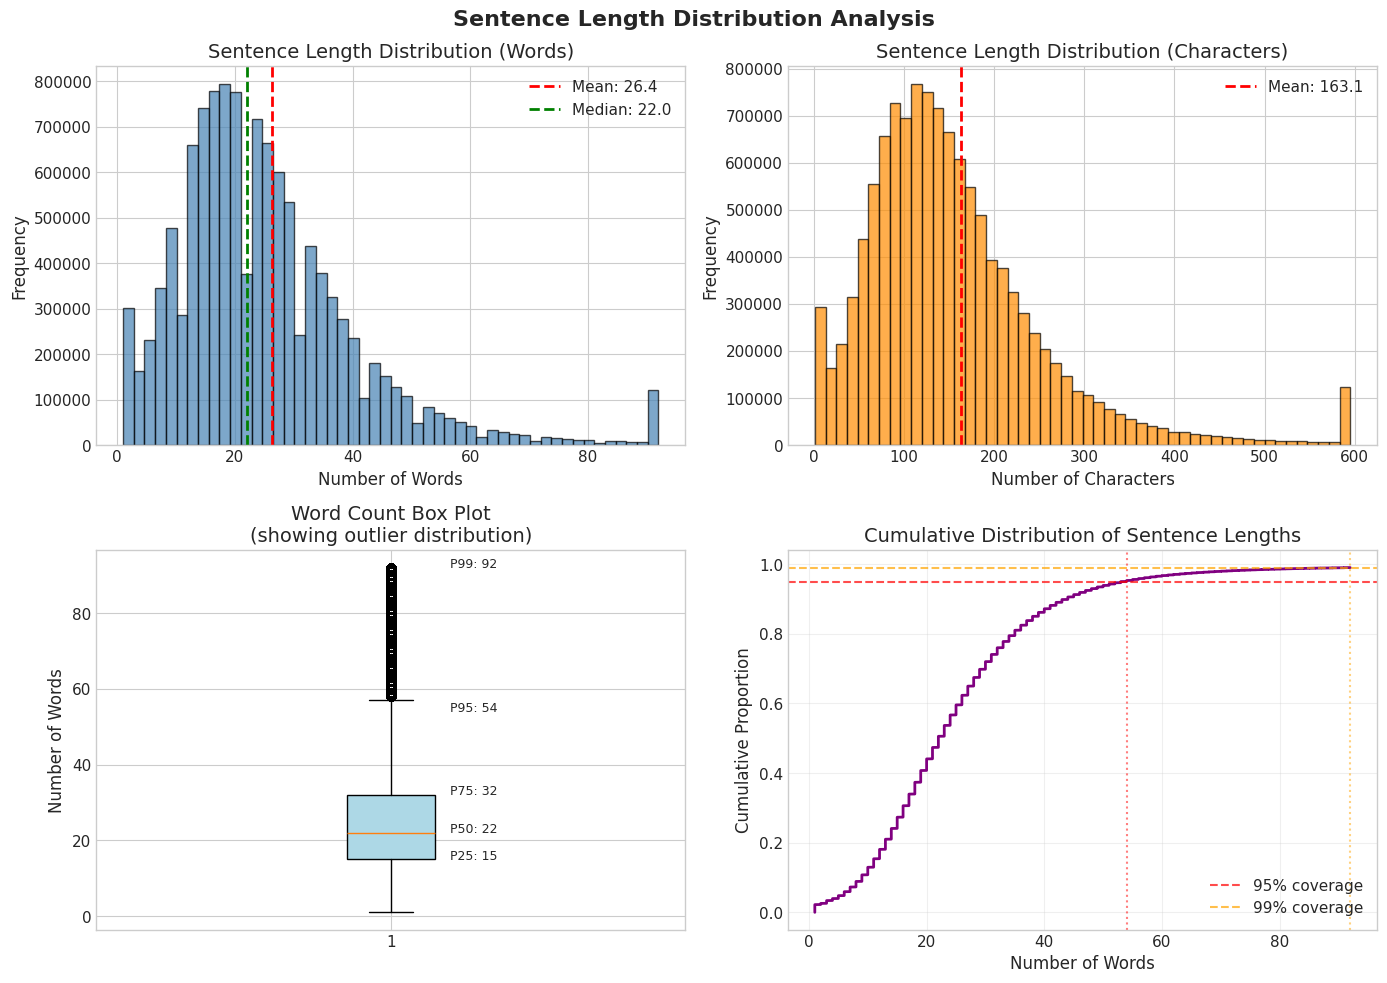

In [42]:
# تابع لحساب عدد المحارف و الكلمات في الجمل
def analyze_sentence_lengths(line_iterator, sample_size: int = 500000) -> tuple:
    logger.info("=" * 70)
    logger.info("📏 SENTENCE LENGTH DISTRIBUTION ANALYSIS")
    logger.info("=" * 70)
    logger.info(f"\n⏳ Analyzing {format_number(sample_size)} sentences...")
    
    word_counts = [] 
    char_counts = [] 
    
    try:
        iterator = tqdm(line_iterator, total=sample_size, desc="Analyzing lengths")
        
        for i, line in enumerate(iterator):
            if i >= sample_size:
                break
            line = line.strip()
            if not line:
                continue
            words = line.split()
            word_counts.append(len(words))
            char_counts.append(len(line))
        logger.info(f"\n   ✅ Analyzed {format_number(len(word_counts))} sentences")
        
    except Exception as e:
        logger.info(f"\n❌ ERROR: {e}")
        return [], []
    
    return word_counts, char_counts

# تابع لعرض الاحصائيات المتعلقة بأطوال الجمل
def display_length_statistics(word_counts: list, char_counts: list):
    if not word_counts:
        logger.info("No data to analyze.")
        return
    
    logger.info("\n" + "-" * 70)
    logger.info("📊 STATISTICAL SUMMARY")
    logger.info("-" * 70)
    
    # التحويل لمصفوفات numpy لتحليل احصائي اسهل
    words = np.array(word_counts)
    chars = np.array(char_counts)
    
    logger.info("\n📝 Sentence Length (WORDS):")
    logger.info(f"   • Count:          {format_number(len(words))} sentences")
    logger.info(f"   • Mean:           {np.mean(words):.2f} words")
    logger.info(f"   • Median:         {np.median(words):.2f} words")
    logger.info(f"   • Std Deviation:  {np.std(words):.2f} words")
    logger.info(f"   • Minimum:        {np.min(words)} words")
    logger.info(f"   • Maximum:        {np.max(words)} words")
    
    logger.info(f"\n   Percentiles:")
    logger.info(f"   • 25th percentile:  {np.percentile(words, 25):.0f} words")
    logger.info(f"   • 50th percentile:  {np.percentile(words, 50):.0f} words")
    logger.info(f"   • 75th percentile:  {np.percentile(words, 75):.0f} words")
    logger.info(f"   • 90th percentile:  {np.percentile(words, 90):.0f} words")
    logger.info(f"   • 95th percentile:  {np.percentile(words, 95):.0f} words")
    logger.info(f"   • 99th percentile:  {np.percentile(words, 99):.0f} words")
    
    logger.info("\n📝 Sentence Length (CHARACTERS):")
    logger.info(f"   • Mean:           {np.mean(chars):.2f} chars")
    logger.info(f"   • Median:         {np.median(chars):.2f} chars")
    logger.info(f"   • Std Deviation:  {np.std(chars):.2f} chars")
    logger.info(f"   • Minimum:        {np.min(chars)} chars")
    logger.info(f"   • Maximum:        {np.max(chars)} chars")
    
    logger.info(f"\n   Percentiles:")
    logger.info(f"   • 95th percentile:  {np.percentile(chars, 95):.0f} chars")
    logger.info(f"   • 99th percentile:  {np.percentile(chars, 99):.0f} chars")
    
    p95_words = np.percentile(words, 95)
    p99_words = np.percentile(words, 99)
    
    logger.info("\n" + "-" * 70)
    logger.info("💡 RECOMMENDATIONS FOR MODEL CONFIGURATION")
    logger.info("-" * 70)
    
    logger.info(f"\n📐 max_length parameter suggestions:")
    logger.info(f"   • Conservative (covers 95%): {int(p95_words * 1.5)} tokens")
    logger.info(f"   • Safe (covers 99%):         {int(p99_words * 1.5)} tokens")
    
    logger.info(f"\n   Note: Multiplied by 1.5 to account for subword tokenization")
    
    very_short = np.sum(words < 3)
    very_long = np.sum(words > 100)
    
    logger.info(f"\n📏 Edge Cases:")
    logger.info(f"   • Very Short Line Count: {very_short} lines (< 3 words)")
    logger.info(f"   • Very Long Line Count:  {very_long} lines (> 100 words)")

# عرض احصائي لتوزيع اطوال الجمل
def plot_length_distribution(word_counts: list, char_counts: list):
    if not word_counts:
        logger.info("No data to plot.")
        return
    words = np.array(word_counts)
    chars = np.array(char_counts)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Sentence Length Distribution Analysis', fontsize=16, fontweight='bold')
    
    ## جدول تعداد الكلمات
    
    ax1 = axes[0, 0]
    
    # ازالة القيم المتطرفة
    word_clip = np.clip(words, 0, np.percentile(words, 99))
    
    ax1.hist(word_clip, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    
    mean_words = np.mean(words)
    median_words = np.median(words)
    ax1.axvline(mean_words, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_words:.1f}')
    ax1.axvline(median_words, color='green', linestyle='--', linewidth=2, 
                label=f'Median: {median_words:.1f}')
    
    ax1.set_xlabel('Number of Words')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Sentence Length Distribution (Words)')
    ax1.legend()
    
    ## جدول تعداد المحارف 
    
    ax2 = axes[0, 1]
    
    char_clip = np.clip(chars, 0, np.percentile(chars, 99))
    
    ax2.hist(char_clip, bins=50, edgecolor='black', alpha=0.7, color='darkorange')
    
    mean_chars = np.mean(chars)
    ax2.axvline(mean_chars, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_chars:.1f}')
    
    ax2.set_xlabel('Number of Characters')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Sentence Length Distribution (Characters)')
    ax2.legend()
    
    ## جدول صندوقي لاطوال الجمل
    ax3 = axes[1, 0]
    
    bp = ax3.boxplot(word_clip, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    
    ax3.set_ylabel('Number of Words')
    ax3.set_title('Word Count Box Plot\n(showing outlier distribution)')
    
    # النسب المئوية التي يتم الحساب عليها
    percentiles = [25, 50, 75, 95, 99]
    for p in percentiles:
        val = np.percentile(words, p)
        ax3.annotate(f'P{p}: {val:.0f}', xy=(1.1, val), fontsize=9)
    
    ## جدول التوزيع التراكمي لاطوال الجمل
    ax4 = axes[1, 1]
    
    # ترتيب اطوال الجمل لحساب التوزيع التراكمي
    sorted_words = np.sort(words)
    cumulative = np.arange(1, len(sorted_words) + 1) / len(sorted_words)
    
    # ازالة القيم المتطرفة
    mask = sorted_words <= np.percentile(words, 99)
    ax4.plot(sorted_words[mask], cumulative[mask], color='purple', linewidth=2)
    
    # اضافة خطوط افقية عند 95% و 99%
    ax4.axhline(0.95, color='red', linestyle='--', alpha=0.7, label='95% coverage')
    ax4.axhline(0.99, color='orange', linestyle='--', alpha=0.7, label='99% coverage')
    
    # ايجاد القيم المقابلة ل 95% و 99%
    p95 = np.percentile(words, 95)
    p99 = np.percentile(words, 99)
    ax4.axvline(p95, color='red', linestyle=':', alpha=0.5)
    ax4.axvline(p99, color='orange', linestyle=':', alpha=0.5)
    
    ax4.set_xlabel('Number of Words')
    ax4.set_ylabel('Cumulative Proportion')
    ax4.set_title('Cumulative Distribution of Sentence Lengths')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    save_figure(fig, 'sentence_length_distribution.png')
    
    plt.show()

line_stream = iter_dataset_lines(DATASET_DIR)

word_counts, char_counts = analyze_sentence_lengths(
    line_stream,
    sample_size=SAMPLE_SIZES['sentence_length']
)

display_length_statistics(word_counts, char_counts)

plot_length_distribution(word_counts, char_counts)

<div dir="rtl" style="text-align: right;">

النتيجة:

اطوال الجمل تتوزع بحدود ال 60 كلمة او اقل

هناك حالة عدم توازن و تواجد قيم متطرفة لجمل طويلة, لذلك يجب الأخذ بالحسبان التقطيع

كما هناك عدد لا بأس به من الجمل القصيرة يجب ازالتها

لكي نشمل كل الحالات يمكن اخذ 128 token لدخل النماذج


</div>